In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 100)


In [4]:
URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
print("Shape:", df.shape)
df.head()


Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:

from google.colab import files
import pandas as pd
import io


up = files.upload()


df = pd.read_csv(io.BytesIO(up[list(up.keys())[0]]))


print("Shape:", df.shape)
df.head()


Saving Iris.csv to Iris.csv
Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))
print("\nNumeric describe:")
df.describe().T


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Numeric describe:


,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
df.isna().sum().sort_values(ascending=False).head(10)

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [10]:

print("\nMissing values per column in current df:")
print(df.isna().sum().sort_values(ascending=False))

df_drop_rows = df.dropna(subset=['Species'])
print("Original:", df.shape, "After drop:", df_drop_rows.shape)


Missing values per column in current df:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Original: (150, 6) After drop: (150, 6)


In [12]:
df_imp = df.copy()

print("\nMissing values per column in the copied df:")
print(df_imp.isna().sum().sort_values(ascending=False).head(10))


Missing values per column in the copied df:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [17]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
knn_df = df[num_cols].copy()

print("\nNumerical columns in the current dataframe:")
print(num_cols)

print("\nMissing values in numerical columns:")
print(knn_df.isna().sum())



Numerical columns in the current dataframe:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Missing values in numerical columns:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


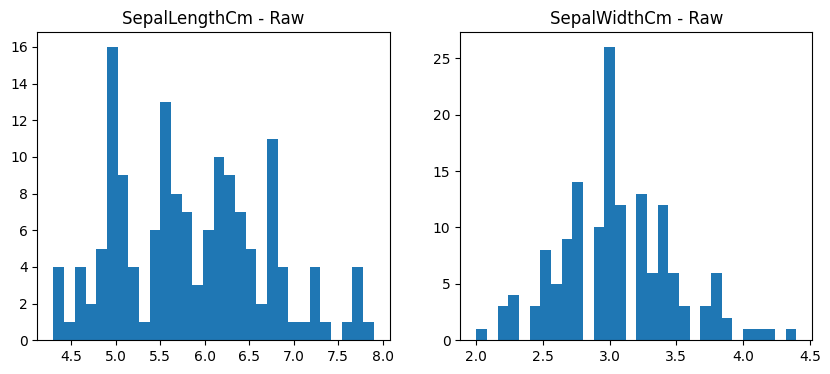

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(df_imp['SepalLengthCm'].dropna(), bins=30)
axes[0].set_title('SepalLengthCm - Raw')
axes[1].hist(df_imp['SepalWidthCm'].dropna(), bins=30)
axes[1].set_title('SepalWidthCm - Raw')
plt.show()

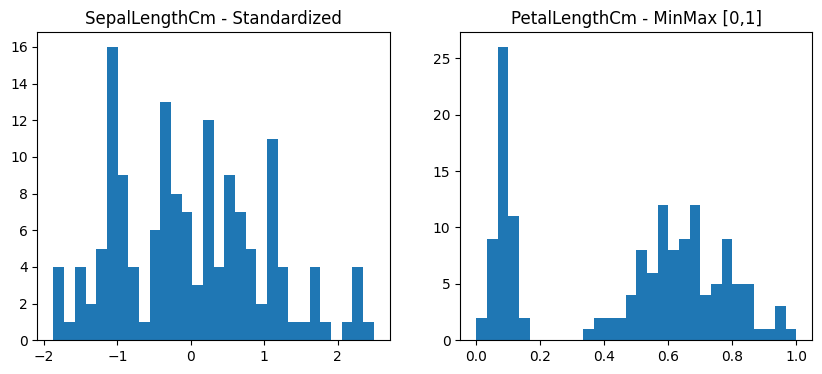

In [19]:
sc_std = StandardScaler()
sc_mm  = MinMaxScaler()

sepal_length_std = sc_std.fit_transform(df_imp[['SepalLengthCm']])
petal_length_mm = sc_mm.fit_transform(df_imp[['PetalLengthCm']])

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(sepal_length_std.flatten(), bins=30)
axes[0].set_title('SepalLengthCm - Standardized')
axes[1].hist(petal_length_mm.flatten(), bins=30)
axes[1].set_title('PetalLengthCm - MinMax [0,1]')
plt.show()

In [21]:
enc = OrdinalEncoder()
ord_demo = df_imp[['Species']].copy()
ord_vals = enc.fit_transform(ord_demo)
pd.DataFrame(ord_vals, columns=['Species_ord']).head()

,Species_ord
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [23]:
ohe_species = pd.get_dummies(df_imp['Species'], prefix='Species')
encoded_df = pd.concat([df_imp[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], ohe_species], axis=1)
encoded_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


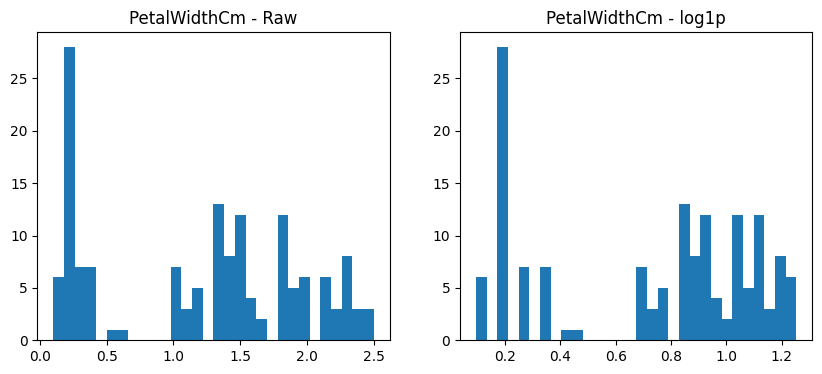

In [25]:
petal_width_raw = df_imp['PetalWidthCm'].dropna().values.reshape(-1,1)
petal_width_log = np.log1p(petal_width_raw)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(petal_width_raw.flatten(), bins=30)
axes[0].set_title('PetalWidthCm - Raw')
axes[1].hist(petal_width_log.flatten(), bins=30)
axes[1].set_title('PetalWidthCm - log1p')
plt.show()

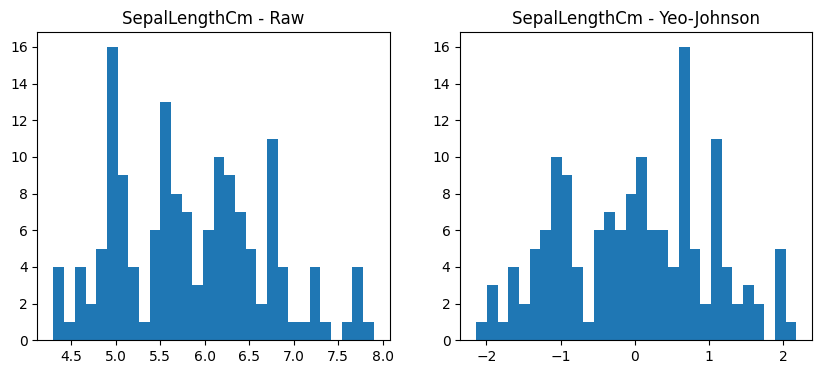

In [27]:
pt = PowerTransformer(method='yeo-johnson')
iris_numerical = df_imp[['SepalLengthCm', 'PetalLengthCm']].dropna()
iris_numerical_pt = pt.fit_transform(iris_numerical)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(iris_numerical['SepalLengthCm'].values, bins=30)
axes[0].set_title('SepalLengthCm - Raw')
axes[1].hist(iris_numerical_pt[:,0], bins=30)
axes[1].set_title('SepalLengthCm - Yeo-Johnson')
plt.show()

In [29]:
poly = PolynomialFeatures(degree=2, include_bias=False)
# Using numerical columns from the Iris dataset
iris_numerical = df_imp[['SepalLengthCm', 'PetalLengthCm']].dropna()
iris_poly = poly.fit_transform(iris_numerical)
print("Original shape:", iris_numerical.shape, " -> With poly:", iris_poly.shape)
print("Feature names:", poly.get_feature_names_out(['SepalLengthCm','PetalLengthCm'])[:6])

Original shape: (150, 2)  -> With poly: (150, 5)
Feature names: ['SepalLengthCm' 'PetalLengthCm' 'SepalLengthCm^2'
 'SepalLengthCm PetalLengthCm' 'PetalLengthCm^2']


Explained variance ratios: [9.99319101e-01 5.14403271e-04]


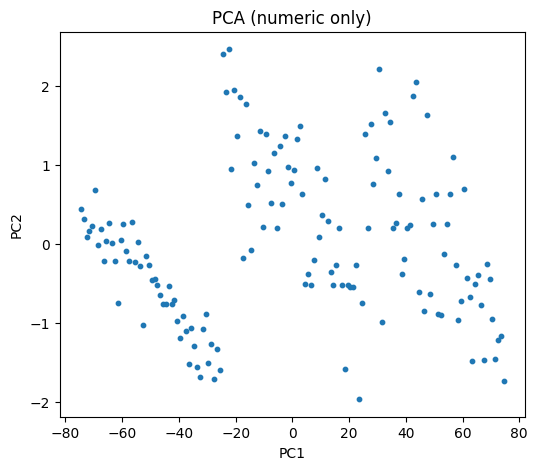

In [30]:
num_only = df_imp.select_dtypes(include=['number']).dropna()
y = df_imp.loc[num_only.index, 'Survived'] if 'Survived' in df_imp.columns else None

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(num_only.values)

print("Explained variance ratios:", pca.explained_variance_ratio_)


plt.figure(figsize=(6,5))
if y is not None:

    idx0 = (y.values == 0)
    idx1 = (y.values == 1)
    plt.scatter(Z[idx0,0], Z[idx0,1], s=10, label='Survived=0')
    plt.scatter(Z[idx1,0], Z[idx1,1], s=10, label='Survived=1')
    plt.legend()
else:
    plt.scatter(Z[:,0], Z[:,1], s=10)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA (numeric only)')
plt.show()

In [31]:

URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(URL)
print("Shape:", df.shape)
display(df.head())

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Task


In [32]:
print("Column information and data types:")
df.info()

print("\nMissing values per column:")
print(df.isna().sum())

Column information and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare      

In [40]:
df_processed = df.copy()


imputer_age = SimpleImputer(strategy='median')
df_processed['Age'] = imputer_age.fit_transform(df_processed[['Age']]).ravel()

imputer_embarked = SimpleImputer(strategy='most_frequent')
df_processed['Embarked'] = imputer_embarked.fit_transform(df_processed[['Embarked']]).ravel()

df_processed['Cabin'] = df_processed['Cabin'].fillna('Unknown')

print("\nMissing values after imputation:")
print(df_processed[['Age', 'Embarked', 'Cabin']].isna().sum())


Missing values after imputation:
Age         0
Embarked    0
Cabin       0
dtype: int64


In [34]:
df_processed = df.copy()

imputer_age = SimpleImputer(strategy='median')
df_processed['Age'] = imputer_age.fit_transform(df_processed[['Age']]).ravel()

imputer_embarked = SimpleImputer(strategy='most_frequent')
df_processed['Embarked'] = imputer_embarked.fit_transform(df_processed[['Embarked']]).ravel()


df_processed['Cabin'] = df_processed['Cabin'].fillna('Unknown')

print("\nMissing values after imputation:")
print(df_processed[['Age', 'Embarked', 'Cabin']].isna().sum())


Missing values after imputation:
Age         0
Embarked    0
Cabin       0
dtype: int64


In [35]:
sc_std = StandardScaler()

df_processed['Age_scaled'] = sc_std.fit_transform(df_processed[['Age']])


sc_mm = MinMaxScaler()

df_processed['Fare_scaled'] = sc_mm.fit_transform(df_processed[['Fare']])

display(df_processed.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_scaled,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,-0.565736,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.663861,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,-0.258337,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.433312,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0.433312,0.015713


In [36]:
ohe_sex = pd.get_dummies(df_processed['Sex'], prefix='Sex')

ohe_embarked = pd.get_dummies(df_processed['Embarked'], prefix='Embarked')

df_processed = pd.concat([df_processed, ohe_sex, ohe_embarked], axis=1).drop(['Sex', 'Embarked'], axis=1)

display(df_processed.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_scaled,Fare_scaled,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,-0.565736,0.014151,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.663861,0.139136,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,-0.258337,0.015469,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.433312,0.103644,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,0.433312,0.015713,False,True,False,False,True


In [37]:
df_processed['Fare_log1p'] = np.log1p(df_processed['Fare'])
display(df_processed.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_scaled,Fare_scaled,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_log1p
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,-0.565736,0.014151,False,True,False,False,True,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.663861,0.139136,True,False,True,False,False,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,-0.258337,0.015469,True,False,False,False,True,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.433312,0.103644,True,False,False,False,True,3.990834
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,0.433312,0.015713,False,True,False,False,True,2.202765


Explained variance ratios: [0.96162475 0.03588549]


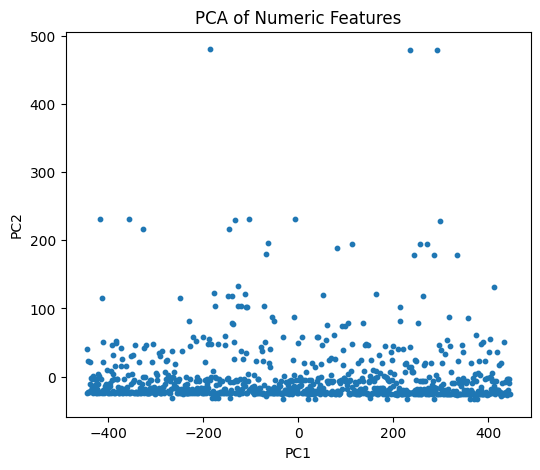

In [38]:
numeric_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
df_numeric = df_processed[numeric_cols]

pca = PCA(n_components=2, random_state=42)

Z = pca.fit_transform(df_numeric)

print("Explained variance ratios:", pca.explained_variance_ratio_)


plt.figure(figsize=(6,5))
plt.scatter(Z[:,0], Z[:,1], s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Numeric Features')
plt.show()